## 1. Importing the required libraries and making some functions ##

In [1]:
# to deal with dataframes and matrices
import pandas as pd
import numpy as np

# for visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# to hide warning messages in plots
import warnings
warnings.filterwarnings('ignore')

In [2]:
# just to center the plots
from IPython.core.display import HTML as Center

Center(""" <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """)

In [3]:
def make_autopct(values):
    '''
    This function sets the autopct for pie charts as I want to appear
    :param values -> the data which is shown in the pie
    '''
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

In [4]:
def setting_dataframe(df):
    '''
    This function display the results in an organized dataframe form
    :param df -> the dataframe 
    '''
    df = df.style.set_table_styles([{"selector": "td, th", "props": [("border", "1px solid grey !important")]},
                                    {"selector": "th", "props": [('text-align', 'center')]}])
    df = df.set_properties(**{'text-align': 'center'}).hide_index()
    return df

## 2. Reading the dataset ##

In [5]:
netflix_df = pd.read_csv("netflix_titles.csv")

In [6]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# set the first column as the dataset's index
netflix_df.set_index("show_id", inplace=True)

In [8]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 3. Data Exploration ##

### 3.1. General information about the data ###

In [9]:
# the size of the data
data_size = netflix_df.shape
print("This data has {} entries and {} features(columns).".format(data_size[0], data_size[1]))

This data has 8807 entries and 11 features(columns).


In [10]:
# the features (columns) of this data
primary_key = netflix_df.index.name
columns = netflix_df.columns
print("The primary key or the index of this data is ({}) and its columns are: ".format(primary_key))
for idx, column in enumerate(columns):
    print("{}) {}".format(idx+1, column), end="\n")

The primary key or the index of this data is (show_id) and its columns are: 
1) type
2) title
3) director
4) cast
5) country
6) date_added
7) release_year
8) rating
9) duration
10) listed_in
11) description


In [11]:
# what each column represents
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


From the previous cell I've gained some information:
1. There're some features(columns) which have more than one information such as __cast__ and __listed_in__
2. The __duration__ column has inconsistent data, as some of the entries are about TV Shows and the other are about Movies
3. There're some movies/tv shows which their title seems as integers!
4. The year in __date_added__ may differ from the __release_year__
5. The __rating__ column has different information from what I expected!

Let's explore those titles which have numbers, and those strange ratings

In [12]:
# 1. exploring the titles
netflix_df["title"].tail(10)

show_id
s8798             Zak Storm
s8799              Zed Plus
s8800                 Zenda
s8801    Zindagi Gulzar Hai
s8802               Zinzana
s8803                Zodiac
s8804           Zombie Dumb
s8805            Zombieland
s8806                  Zoom
s8807                Zubaan
Name: title, dtype: object

It seems that titles are ordered alphabetically, so the entries with numbers as their titles may be real movies/tv shows.
> After some search, I've found that those movies/tv shows exist and those are their real names.

In [13]:
# 2. exploring the ratings
netflix_df["rating"].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

To understand what those ratings represent, I need Google's help :)
> After some search, I've found that those ratings are not our ratings but They're MPA film ratings.

MPA stands for Motion Picture Associations, their film rating system provides parents with the information needed to determine if a film is appropriate for their children.

Now it's better to change this column's name to avoid any misunderstanding.

In [14]:
netflix_df.rename(columns={"rating": "MPA_rating"}, inplace=True)

<hr>

### <u>Ratings Guide:</u> ###
* __TV-MA__ : Unsuitable for children under 17 (Mature Audience Only).
<br>

* __TV-14__ : Unsuitable for children under 14.
<br>

* __TV-PG__ : Parents or guardians may find inappropriate for younger children.
<br>

* __R__ : Under 17 requires accompanying parent or adult guardian (Restricted).
<br>

* __PG-13__ : Parents strongly cautioned, some material may be inappropriate for children under 13.
<br>

* __TV-Y__ : Programs aimed at a very young audience, including children from ages 2-6.
<br>

* __TV-Y7__ : Programs most appropriate for children age 7 and up.
<br>

* __PG__ : Some material may not be suitable for children (Parental Guidance suggested).
<br>

* __TV-G__ : Programs suitable for all ages; these are not necessarily children's shows.
<br>

* __NR__ : (Not Rated)
<br>

* __G__ : (General Audiences)
<br>

* __TV-Y7-FV__ : Programming with fantasy violence that may be more intense or more combative than other programming in the TV-Y7 category.
<br>

* __UR__ : (Un-rated) (Same as NR)
<br>

* __NC-17__ : No children under 17

<hr>

In [15]:
# let's move to the data types
netflix_df.dtypes

type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
MPA_rating      object
duration        object
listed_in       object
description     object
dtype: object

From the previous cell, it seems that there're some columns which have incorrect data types such as __date_added__. They've to be *datetime* (will deal with it in the __Data Cleaning__ phase).

<hr>

### 3.2. Exploring some categorized columns ### 

In [16]:
netflix_df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [17]:
netflix_df['country'].value_counts()

United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 748, dtype: int64

In the previous cell, I've found that there're some columns which have more than one information per entry such as __cast__ and __listed_in__. Now, the __country__ column will join them because as shown, there're entries with more than one country.

In [18]:
netflix_df['release_year'].value_counts()

2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: release_year, Length: 74, dtype: int64

In [19]:
netflix_df['MPA_rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: MPA_rating, dtype: int64

In [20]:
netflix_df['listed_in'].value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: listed_in, Length: 514, dtype: int64

<hr>

## 4. Data Cleaning ##

### 4.1. Search for duplicated entries ###

In [21]:
duplicateRows = netflix_df[netflix_df.duplicated(["title"])]
duplicateRows

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,


Nice! There's no duplicated entries.

<hr>

### 4.2. Search for nulls ###

In [22]:
netflix_df.isnull().sum()

type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
MPA_rating         4
duration           3
listed_in          0
description        0
dtype: int64

It seems that there're some columns with few nulls such as __date_added__ and __rating__, and many columns with MANY nulls such as __director__, __cast__ and __country__.

#### 4.2.1. Let's deal with the columns with few nulls ####

<ul>
    1. Movies/TV Shows ratings
</ul>

In [23]:
# there's 7 non-rating movies, let's show them and try to find their rates
netflix_df[netflix_df["MPA_rating"].isnull()]

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


#### From Netflix and IMDB platforms, I found that the movies' ratings are ####
* 13th: A Conversation with Oprah Winfrey & Ava DuVernay : PG-13
* Gargantia on the Verdurous Planet : TV-14
* Little Lunch : TV-MA
* Louis C.K. 2017 : TV-MA
* Louis C.K.: Hilarious : NR
* Louis C.K.: Live at the Comedy Store : NC-17
* My Honor Was Loyalty : PG-13

In [24]:
# let's assign the ratings
netflix_df.loc[netflix_df['title']=="13TH: A Conversation with Oprah Winfrey & Ava DuVernay", 'MPA_rating'] = "PG-13"
netflix_df.loc[netflix_df['title']=="Gargantia on the Verdurous Planet", 'MPA_rating'] = "TV-14"
netflix_df.loc[netflix_df['title']=="Little Lunch", 'MPA_rating'] = "TV-MA"
netflix_df.loc[netflix_df['title']=="Louis C.K. 2017", 'MPA_rating'] = "TV-MA"
netflix_df.loc[netflix_df['title']=="Louis C.K.: Hilarious", 'MPA_rating'] = "NR"
netflix_df.loc[netflix_df['title']=="Louis C.K.: Live at the Comedy Store", 'MPA_rating'] = "NC-17"
netflix_df.loc[netflix_df['title']=="My Honor Was Loyalty", 'MPA_rating'] = "PG-13"

In [25]:
netflix_df["MPA_rating"].isnull().sum()

0

<ul>
    2. Movies/TV Shows added date
</ul>

In [26]:
# there're 10 movies which their date_added is null
netflix_df[netflix_df['date_added'].isnull()]

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s6067,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
s6175,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
s6796,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
s6807,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
s6902,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
s7197,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
s7255,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
s7407,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
s7848,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."


#### From IMDB, we found their added dates ####
* A Young Doctor's Notebook and Other Stories : Oct 2, 2013
* Anthony Bourdain: Parts Unknown : Apr 14, 2013
* Frasier : Sep 23, 2003
* Friends : Sep 25, 2003
* Gunslinger Girl : Jan 7, 2008
* Kikoriki : Just 2010
* La Familia P. Luche : Jul 8, 2012
* Maron : May 4, 2016
* Red vs. Blue : Apr 1, 2015
* The Adventures of Figaro Pho : Just 2015

In [27]:
# let's assign the ratings
netflix_df.loc[netflix_df['title']=="A Young Doctor's Notebook and Other Stories", 'date_added'] = "October 2, 2013"
netflix_df.loc[netflix_df['title']=="Anthony Bourdain: Parts Unknown", 'date_added'] = "April 14, 2013"
netflix_df.loc[netflix_df['title']=="Frasier", 'date_added'] = "September 23, 2003"
netflix_df.loc[netflix_df['title']=="Friends", 'date_added'] = "September 25, 2003"
netflix_df.loc[netflix_df['title']=="Gunslinger Girl", 'date_added'] = "January 7, 2008"
netflix_df.loc[netflix_df['title']=="Kikoriki", 'date_added'] = "2010"
netflix_df.loc[netflix_df['title']=="La Familia P. Luche", 'date_added'] = "July 8, 2012"
netflix_df.loc[netflix_df['title']=="Maron", 'date_added'] = "May 4, 2016"
netflix_df.loc[netflix_df['title']=="Red vs. Blue", 'date_added'] = "April 1, 2015"
netflix_df.loc[netflix_df['title']=="The Adventures of Figaro Pho", 'date_added'] = "2015"

In [28]:
netflix_df["date_added"].isnull().sum()

0

#### 4.2.2. Let's deal with the columns with many nulls ####

<ul>
    1. country
</ul>

In [29]:
null_countires = netflix_df['country'].isnull().sum()
print("The number of entries which have no country (Null) = {}\
      \nThe percentage between those entries and the total entries is {} %".format(null_countires, round(null_countires/data_size[0]*100, 2)))

The number of entries which have no country (Null) = 831      
The percentage between those entries and the total entries is 9.44 %


In [30]:
# the percentage shows that those entries' number is very small relative to the whole data, so we can rdrop them
netflix_df = netflix_df[netflix_df['country'].notna()]

In [31]:
netflix_df["country"].isnull().sum()

0

<ul>
    2. cast and director
    
    Those columns have so many null values, but I'm not interested in them so I'll not drop their entries.
</ul>

<hr>

### 4.3. Converting some columns to their proper types ### 

In [32]:
# converting date_added to datetime
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])

In [33]:
netflix_df.dtypes

type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
MPA_rating              object
duration                object
listed_in               object
description             object
dtype: object

In [34]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


<hr>

## 5. Data Analysis  and Visualization ##

### 5.1. TV shows vs. Movies ###

In [35]:
tv_vs_movies = netflix_df['type'].value_counts()
tv_vs_movies

Movie      5691
TV Show    2285
Name: type, dtype: int64

In [36]:
tv_vs_movies = tv_vs_movies.to_list()

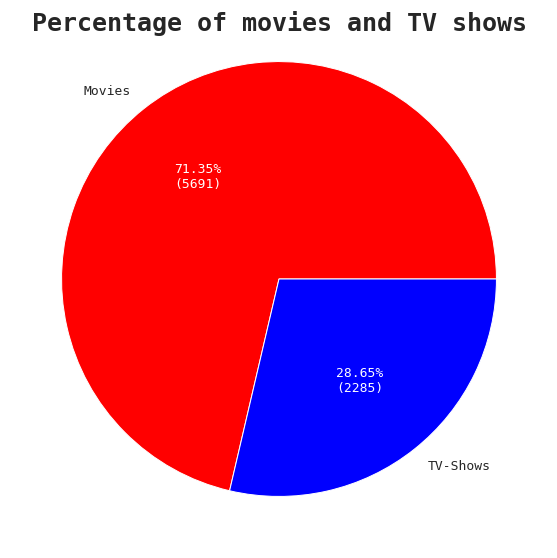

In [39]:
figure = plt.figure(figsize=(10, 10))
_, _, autotexts = plt.pie(tv_vs_movies,
                          labels=['Movies', 'TV-Shows'],
                          autopct=make_autopct(tv_vs_movies), colors=["red", "blue"],
                          textprops={"fontsize":13, "fontname": "monospace"},
                          wedgeprops = {"edgecolor" : "white", 'linewidth': 1, 'antialiased': True})
for autotext in autotexts:
    autotext.set_color('white')
plt.title("Percentage of movies and TV shows", fontsize=25, fontweight="bold", fontname="monospace",  y=0.945)
plt.show()

<hr>

### 5.2. The growth of content creation over the years ###

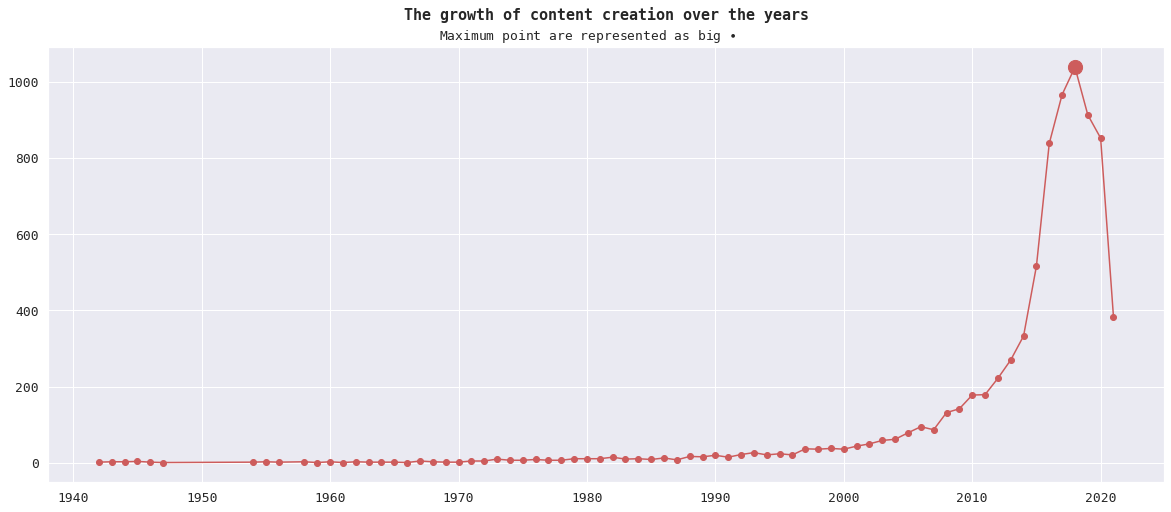

In [41]:
number_of_contents = netflix_df.groupby('release_year').size().to_list()
years = np.sort(netflix_df['release_year'].unique())
max_number_of_contents = max(number_of_contents)
index = number_of_contents.index(max(number_of_contents))
 
figure = plt.figure(figsize=(20, 8))
plt.plot(years, number_of_contents, color="indianred", marker='o', markersize=6)
plt.scatter(years[index], max_number_of_contents, s=200, color="indianred", marker='o')

plt.title("The growth of content creation over the years", fontsize=15, fontweight="bold", fontname="monospace", y=1.05)
plt.suptitle("Maximum point are represented as big {}".format(r'$\bullet$'),
             fontsize=13,fontname="monospace", y=0.915)
plt.xticks(fontsize=13, fontname="monospace")
plt.yticks(fontsize=13, fontname="monospace")
plt.show()

The viz shows that the year with the highest number of content is 2018 which means that the data may be not complete.

<hr>

### 5.3. Monitor content creations along the months ###

In [42]:
netflix_df['month_added'] = pd.DatetimeIndex(netflix_df['date_added']).month

In [43]:
netflix_df.head()

,type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description,month_added
show_id,,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9
s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",9
s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,9


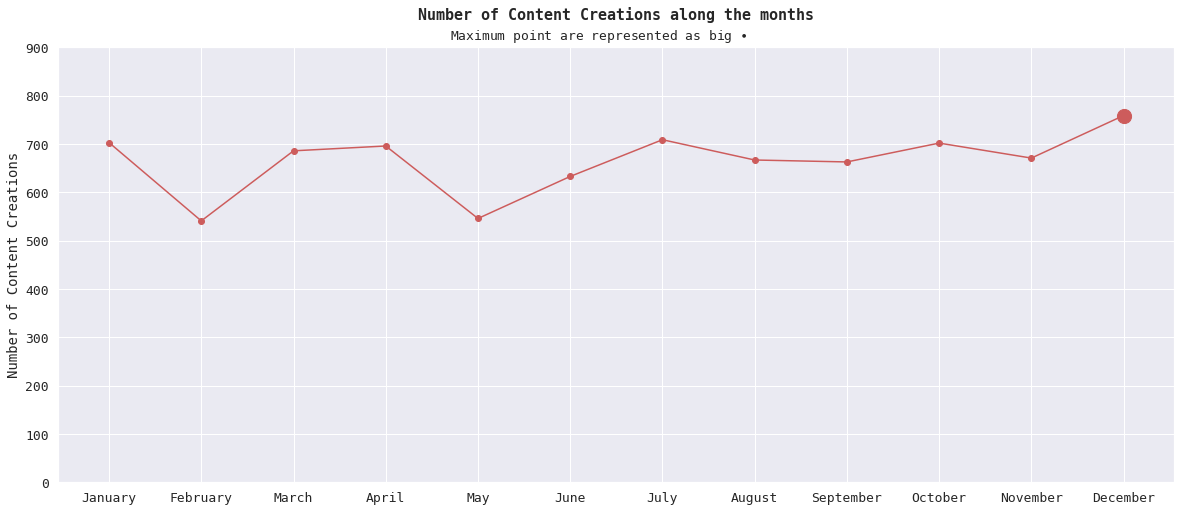

In [44]:
number_of_contents = netflix_df.groupby('month_added').size().to_list()
months_names = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

max_number_of_contents = max(number_of_contents)
index = number_of_contents.index(max(number_of_contents))

figure = plt.figure(figsize=(20, 8))
plt.plot(months_names, number_of_contents, color="indianred", marker='o', markersize=6)
plt.scatter(months_names[index], max_number_of_contents, s=200, color="indianred", marker='o')

plt.title("Number of Content Creations along the months", fontsize=15, fontweight="bold", fontname="monospace", y=1.05)
plt.suptitle("Maximum point are represented as big {}".format(r'$\bullet$'),
             fontsize=13,fontname="monospace", y=0.915)
plt.ylabel("Number of Content Creations", fontsize=14, fontname="monospace")
plt.xticks(fontsize=13, fontname="monospace")
plt.yticks(fontsize=13, fontname="monospace")
plt.ylim([0, 900])
plt.show()

<hr>

### 5.4. The oldest 10 tv series and movies ###

In [45]:
# the oldest 10 tv series
oldest_tv_series = netflix_df[netflix_df['type']=="TV Show"][['title','release_year']].sort_values(by="release_year").head(10)
setting_dataframe(oldest_tv_series.reset_index())

show_id,title,release_year
s1332,Five Came Back: The Reference Films,1945
s7744,Pioneers of African-American Cinema,1946
s8542,The Twilight Zone (Original Series),1963
s8190,The Andy Griffith Show,1967
s4551,Monty Python's Fliegender Zirkus,1972
s4552,Monty Python's Flying Circus,1974
s6550,Dad's Army,1977
s6675,El Chavo,1979
s7589,Ninja Hattori,1981
s7879,Robotech,1985


In [46]:
# the oldest 10 movies
oldest_movies = netflix_df[netflix_df['type']=="Movie"][['title','release_year']].sort_values(by="release_year").head(10)
setting_dataframe(oldest_movies.reset_index())

show_id,title,release_year
s8206,The Battle of Midway,1942
s7791,Prelude to War,1942
s8764,WWII: Report from the Aleutians,1943
s8740,Why We Fight: The Battle of Russia,1943
s8661,Undercover: How to Operate Behind Enemy Lines,1943
s8420,The Memphis Belle: A Story of a Flying Fortress,1944
s8641,Tunisian Victory,1944
s8437,The Negro Soldier,1944
s7576,Nazi Concentration Camps,1945
s7931,San Pietro,1945


<hr>

### 5.5. The highest 10 countries contributed in content creation ###

As we see, many movies or TV shows were filmed in many countries, and we want to take into count all the countires. So, we need to get in every movies/TV show and see the countries where they were filmed.

In [47]:
def count_countires(countries_df):
    '''
    This function just counts the number of countries appears in each entry and returns the dictionary which contains this information
    :param countries_df -> the dataframe which I need to count the countries appear in it
    '''
    countries_dict = dict()
    for country_entry in countries_df:
        countries_list = country_entry.split(', ')
        for country in countries_list:
            if country in countries_dict.keys():
                countries_dict[country] += 1
            else:
                countries_dict[country] = 1
    return countries_dict

In [48]:
movies_countries = netflix_df[netflix_df["type"]=="Movie"]["country"]
shows_countries = netflix_df[netflix_df["type"]=="TV Show"]["country"]

movies_dict = count_countires(movies_countries)
shows_dict = count_countires(shows_countries)

# to see the results in a dataframe
movies = pd.DataFrame(movies_dict.items(), columns=["Country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)

shows = pd.DataFrame(shows_dict.items(), columns=["Country", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)

In [49]:
display(setting_dataframe(movies))

Country,Frequency
United States,2751
India,962
United Kingdom,532
Canada,319
France,303
Germany,182
Spain,171
Japan,119
China,114
Mexico,111


In [50]:
display(setting_dataframe(shows))

Country,Frequency
United States,938
United Kingdom,272
Japan,199
South Korea,170
Canada,126
France,90
India,84
Taiwan,70
Australia,66
Spain,61


In [51]:
# as we see, the order is not the same in both movies and tv shows dataframes.
# to solve this and get more consistent resuts I merge the 2 dataframes

all_contents = movies.merge(shows, how="outer", on="Country").head(10)
all_contents.rename(columns={"Frequency_x": "Number of Movies", "Frequency_y": "Number of TV Shows"}, inplace=True)
all_contents = all_contents.astype({"Number of Movies":'int64', "Number of TV Shows":'int64'})
display(setting_dataframe(all_contents))

Country,Number of Movies,Number of TV Shows
United States,2751,938
India,962,84
United Kingdom,532,272
Canada,319,126
France,303,90
Germany,182,44
Spain,171,61
Japan,119,199
China,114,48
Mexico,111,58


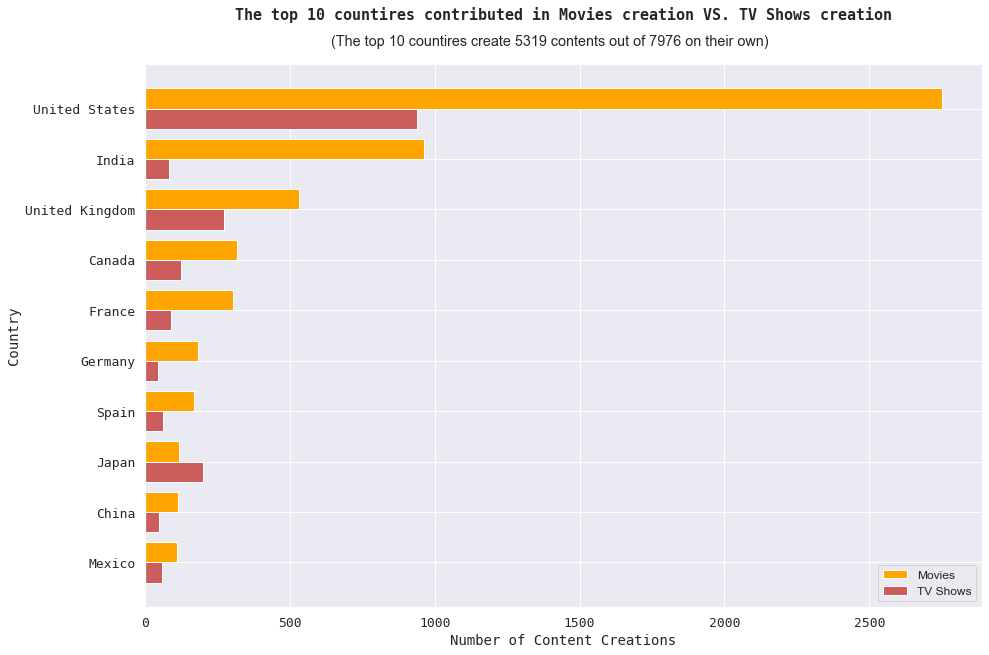

In [52]:
num_of_movies = all_contents["Number of Movies"]
num_of_shows = all_contents["Number of TV Shows"]

ind = np.arange(len(num_of_movies))
width = 0.4

figure = plt.figure(figsize=(15,10))

plt.barh(ind, num_of_movies, width, color="orange", label="Movies")
plt.barh(ind + width, num_of_shows, width, color="indianred", label="TV Shows")

plt.title("The top 10 countires contributed in Movies creation VS. TV Shows creation", fontname="monospace", fontsize=15, fontweight="bold", y=1.07)
plt.suptitle("(The top 10 countires create {} contents out of {} on their own)"
             .format(sum(netflix_df.groupby('country').size().sort_values(ascending=False)[:10]), netflix_df.shape[0]), y=0.92)
plt.ylabel("Country", fontsize=14, fontname="monospace")
plt.xlabel("Number of Content Creations", fontsize=14, fontname="monospace")
plt.yticks(ind + 0.2, labels=all_contents["Country"], fontsize=13, fontname="monospace")
plt.xticks(fontsize=13, fontname="monospace")
plt.gca().invert_yaxis()
plt.legend(fontsize="medium")
plt.show()

<hr>

### 5.6. The most frequent categories ###

Also here, many movies or TV shows are categorized in different categories at the same time, and we want to take into count all the categories. So, we need to get in every movies/TV show and see its categories.

In [53]:
categories_df = netflix_df.loc[netflix_df['listed_in'].notnull()]['listed_in']

categories_dict = dict()
for category_entry in categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in categories_dict.keys():
            categories_dict[category] += 1
        else:
            categories_dict[category] = 1
            
# to see the results in a dataframe
results = pd.DataFrame(categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
display(setting_dataframe(results.head(10)))

Category,Frequency
International Movies,2543
Dramas,2317
Comedies,1580
International TV Shows,1128
Action & Adventure,817
Documentaries,794
Independent Movies,745
TV Dramas,663
Romantic Movies,588
Thrillers,549


As we see, movies have their own categories which are different from the categories of TV shows.
For example: Movies have "International Movies and Dramasa" and TV Shows have "International TV Shows and TV Dramas"
So, it's better to show them separately.

In [54]:
movies_categories_df = netflix_df[netflix_df.loc[netflix_df['listed_in'].notnull()]["type"]=="Movie"]['listed_in']

movies_categories_dict = dict()
for category_entry in movies_categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in movies_categories_dict.keys():
            movies_categories_dict[category] += 1
        else:
            movies_categories_dict[category] = 1
            
# to see the results in a dataframe
movies = pd.DataFrame(movies_categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
display(setting_dataframe(movies.head(10)))

Category,Frequency
International Movies,2543
Dramas,2317
Comedies,1580
Action & Adventure,817
Documentaries,794
Independent Movies,745
Romantic Movies,588
Thrillers,549
Children & Family Movies,535
Horror Movies,340


In [55]:
shows_categories_df = netflix_df[netflix_df.loc[netflix_df['listed_in'].notnull()]["type"]=="TV Show"]['listed_in']

shows_categories_dict = dict()
for category_entry in shows_categories_df:
    categories_list = category_entry.split(', ')
    for category in categories_list:
        if category in shows_categories_dict.keys():
            shows_categories_dict[category] += 1
        else:
            shows_categories_dict[category] = 1
            
# to see the results in a dataframe
shows = pd.DataFrame(shows_categories_dict.items(), columns=["Category", "Frequency"]).sort_values(by="Frequency", ascending=False).reset_index(drop=True)
display(setting_dataframe(shows.head(10)))

Category,Frequency
International TV Shows,1128
TV Dramas,663
TV Comedies,501
Crime TV Shows,421
Kids' TV,370
Docuseries,330
Romantic TV Shows,299
British TV Shows,237
Reality TV,205
Anime Series,154


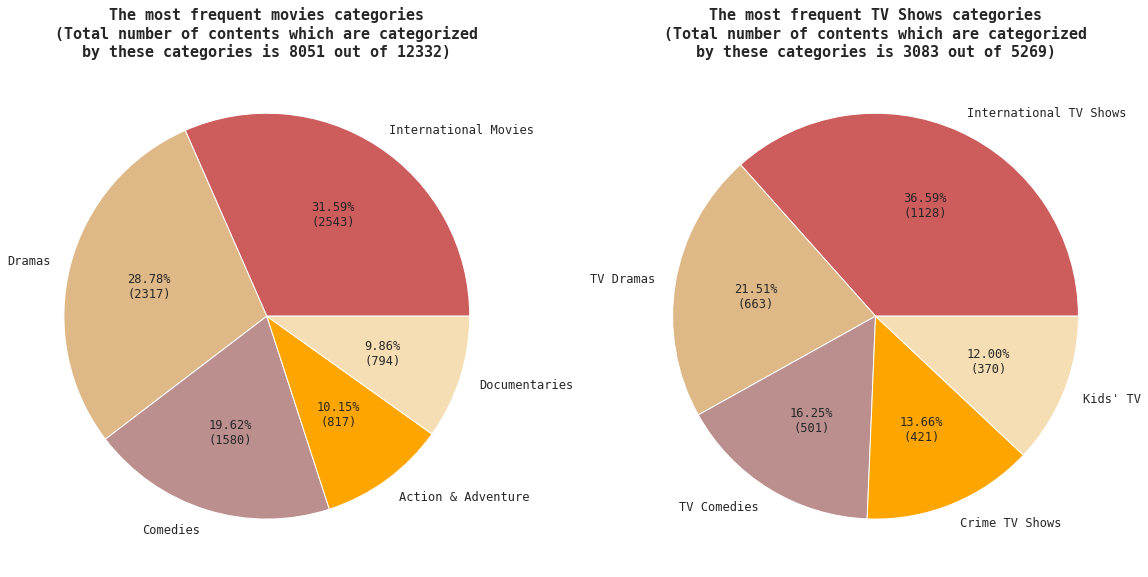

In [56]:
figure = plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)

top_ten_movies_categories = movies.head(5)

colors = ["indianred", "burlywood", "rosybrown", "orange", "wheat"]
plt.pie(top_ten_movies_categories["Frequency"], labels=top_ten_movies_categories["Category"],
        colors=colors,
        autopct = make_autopct(top_ten_movies_categories['Frequency']),
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,
                      'antialiased': True},
        textprops={"fontname": 'monospace',
                  "fontsize": 12})
plt.title("The most frequent movies categories\n(Total number of contents which are categorized\nby these categories is {} out of {})"
             .format(sum(top_ten_movies_categories["Frequency"]), movies["Frequency"].sum()),
          fontname = "monospace", fontsize = 15, fontweight = "bold")
plt.subplot(1, 2, 2)

top_ten_shows_categories = shows.head(5)

colors = ["indianred", "burlywood", "rosybrown", "orange", "wheat"]
plt.pie(top_ten_shows_categories["Frequency"], labels=top_ten_shows_categories["Category"],
        colors=colors,
        autopct = make_autopct(top_ten_shows_categories['Frequency']),
        wedgeprops = {"edgecolor" : "white",
                      'linewidth': 1,
                      'antialiased': True},
        textprops={"fontname": 'monospace',
                  "fontsize": 12})
plt.title("The most frequent TV Shows categories\n(Total number of contents which are categorized\nby these categories is {} out of {})"
             .format(sum(top_ten_shows_categories["Frequency"]), shows["Frequency"].sum())
          , fontname = "monospace", fontsize = 15, fontweight = "bold")
plt.ylabel("")
plt.show()

<hr>

### 5.7. Number of movies and tv shows by MPA rating ###

In [57]:
netflix_df["MPA_rating"].value_counts().sort_values(ascending=True)[:10]

UR            3
NC-17         4
TV-Y7-FV      5
G            41
NR           81
TV-G        190
TV-Y        227
TV-Y7       236
PG          281
PG-13       483
Name: MPA_rating, dtype: int64

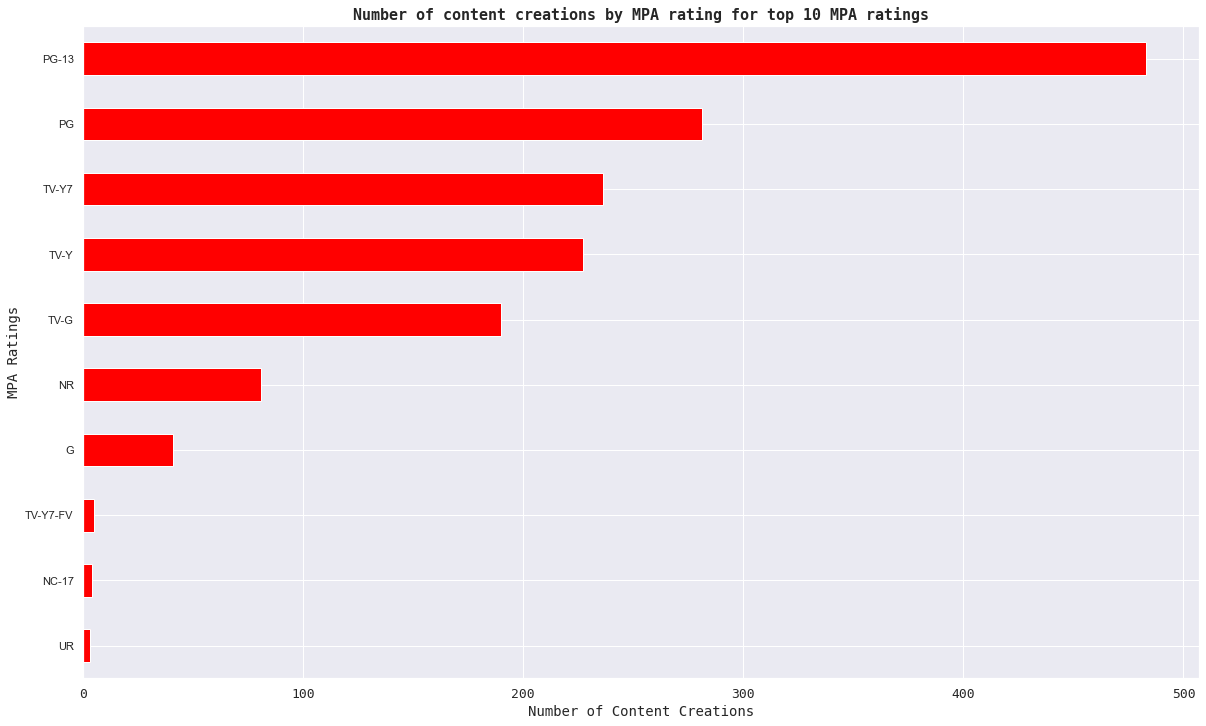

In [61]:
figure = plt.figure(figsize=(20, 12))
netflix_df["MPA_rating"].value_counts().sort_values()[:10].plot(kind="barh", color="red")
plt.title("Number of content creations by MPA rating for top 10 MPA ratings", fontname="monospace", fontsize=15, fontweight="bold")
plt.xlabel("Number of Content Creations", fontsize=14, fontname="monospace")
plt.ylabel("MPA Ratings", fontsize=14, fontname="monospace")
plt.xticks(fontsize=13, fontname="monospace")
plt.show()

<hr>

### 5.8. My favourite movie/tv-show ###

In [60]:
fav_tv_show = "Friends"
setting_dataframe(netflix_df[netflix_df['title']==fav_tv_show])

type,title,director,cast,country,date_added,release_year,MPA_rating,duration,listed_in,description,month_added
TV Show,Friends,nan,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, Matt LeBlanc, Matthew Perry, David Schwimmer",United States,2003-09-25 00:00:00,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies","This hit sitcom follows the merry misadventures of six 20-something pals as they navigate the pitfalls of work, life and love in 1990s Manhattan.",9


- - - -